# Using Google Colab with GitHub



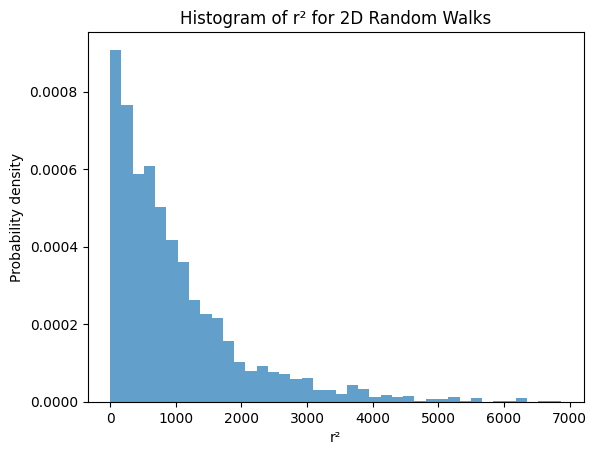

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 2D Random Walk Simulation
# -----------------------------

def random_walk_2d(steps):
    """Simulate a 2D random walk with ±1 steps in x and y."""
    dx = np.random.choice([-1, 1], size=steps)
    dy = np.random.choice([-1, 1], size=steps)
    x = np.cumsum(dx)
    y = np.cumsum(dy)
    return x, y

# Parameters
num_walks = 2000
steps = 500

final_positions = []

# Generate many walks
for _ in range(num_walks):
    x, y = random_walk_2d(steps)
    final_positions.append([x[-1], y[-1]])

final_positions = np.array(final_positions)

# Compute r^2
r2 = final_positions[:,0]**2 + final_positions[:,1]**2

# Plot histogram of r^2
plt.hist(r2, bins=40, density=True, alpha=0.7)
plt.xlabel("r²")
plt.ylabel("Probability density")
plt.title("Histogram of r² for 2D Random Walks")
plt.show()


The graph depicts a straightforward tale about the number of 2D random walkers who reach their destination from the beginning point. Step by step, each walker walks at random, and one can determine how far it went overall by calculating . The histogram shows a large cluster close to little (r^2), indicating that most walkers do not walk very far since their steps cancel out. The bars extend to the right, creating a lengthy tail, when a few walkers accidentally stray farther away. This shape many minor displacements and few large ones—is typical for diffusion. It demonstrates how random motion permits sporadic extended excursions while mostly staying close to the start.


[Google Colaboratory](http://colab.research.google.com) is designed to integrate cleanly with GitHub, allowing both loading notebooks from github and saving notebooks to github.

Theoretical diffusion constant D = 0.5


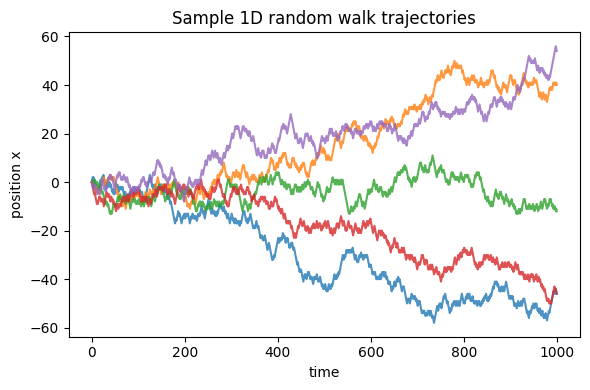

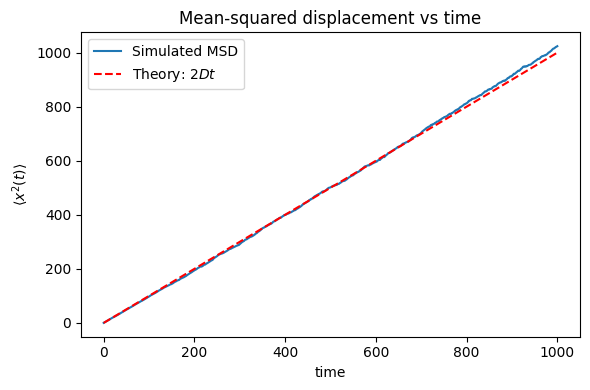

Fitted slope = 1.0239621598149602
Estimated D from fit = 0.5119810799074801


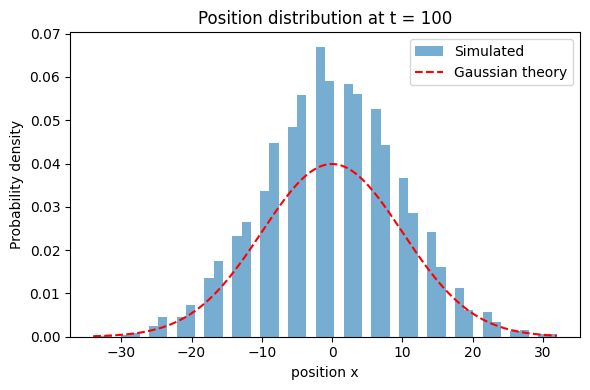

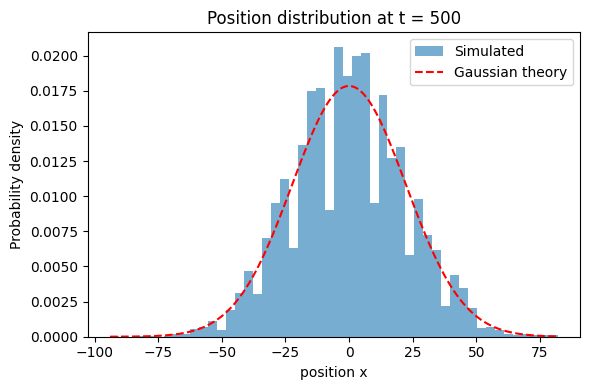

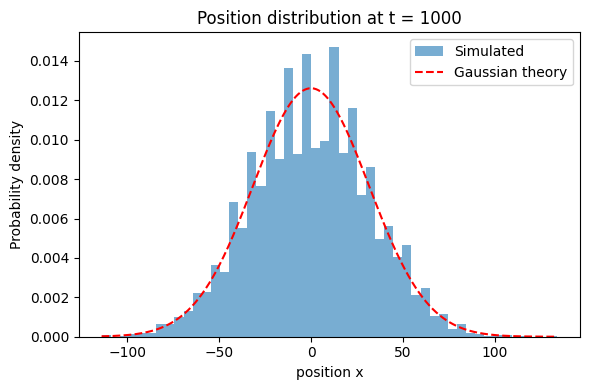

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
a = 1.0          # step size
dt = 1.0         # time step
n_steps = 1000   # steps per walk
n_walkers = 5000 # number of independent walkers

D_theory = a**2 / (2 * dt)
print("Theoretical diffusion constant D =", D_theory)

# -----------------------------
# 1D random walk simulator
# -----------------------------
def random_walk_1d(n_steps, n_walkers, a=1.0):
    """
    Returns positions array of shape (n_steps+1, n_walkers).
    positions[t, i] = position of walker i at time step t.
    """
    # steps: +a or -a with equal probability
    steps = a * np.random.choice([-1, 1], size=(n_steps, n_walkers))
    # cumulative sum over time, starting at x=0
    positions = np.zeros((n_steps + 1, n_walkers))
    positions[1:, :] = np.cumsum(steps, axis=0)
    return positions

positions = random_walk_1d(n_steps, n_walkers, a=a)

# Time array
t = np.arange(n_steps + 1) * dt

# -----------------------------
# Example trajectories
# -----------------------------
plt.figure(figsize=(6, 4))
for i in range(5):  # plot a few sample walkers
    plt.plot(t, positions[:, i], alpha=0.8)
plt.xlabel("time")
plt.ylabel("position x")
plt.title("Sample 1D random walk trajectories")
plt.tight_layout()
plt.show()

# -----------------------------
# Mean-squared displacement
# -----------------------------
msd = np.mean(positions**2, axis=1)  # average over walkers

plt.figure(figsize=(6, 4))
plt.plot(t, msd, label="Simulated MSD")
plt.plot(t, 2 * D_theory * t, 'r--', label=r"Theory: $2Dt$")
plt.xlabel("time")
plt.ylabel(r"$\langle x^2(t) \rangle$")
plt.title("Mean-squared displacement vs time")
plt.legend()
plt.tight_layout()
plt.show()

# Optional: linear fit to MSD vs t (excluding t=0)
coeffs = np.polyfit(t[1:], msd[1:], 1)
slope, intercept = coeffs
D_fit = slope / 2.0
print("Fitted slope =", slope)
print("Estimated D from fit =", D_fit)

# -----------------------------
# Position histogram at selected times
# -----------------------------
def plot_histogram_at_time(positions, t_index, a, dt, D_theory):
    """
    Plot histogram of positions at a given time index and overlay Gaussian.
    """
    x = positions[t_index, :]
    time = t_index * dt

    plt.figure(figsize=(6, 4))
    # Histogram
    counts, bins, _ = plt.hist(x, bins=50, density=True, alpha=0.6, label="Simulated")

    # Theoretical Gaussian
    var = 2 * D_theory * time
    if var > 0:
        x_theory = np.linspace(x.min(), x.max(), 400)
        prefactor = 1.0 / np.sqrt(2 * np.pi * var)
        gaussian = prefactor * np.exp(-x_theory**2 / (2 * var))
        plt.plot(x_theory, gaussian, 'r--', label="Gaussian theory")

    plt.xlabel("position x")
    plt.ylabel("Probability density")
    plt.title(f"Position distribution at t = {time:.0f}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example times to inspect
for t_index in [100, 500, 1000]:
    plot_histogram_at_time(positions, t_index, a, dt, D_theory)


Sample 1D Random Walk Each of the five one-dimensional random walks in this image moves randomly to the left or right with each step. Because the motion is entirely random, the lines wriggle up and down, causing the walker to occasionally move upward, downward, and back toward the center. Despite starting at zero, the walkers soon disperse since each one goes through a unique series of arbitrary steps. The main takeaway is that although random motion produces unpredictable routes, each one generally follows the same pattern of wandering.

Mean Squared displacement vs time This graph illustrates how a random walker's **average squared distance** increases over time. Every point on the blue line represents a random step-by-step movement of several walkers in your simulation. The walkers get increasingly dispersed over time, increasing the mean-squared displacement. Theoretically, the growth should be a straight line with a slope of (2D), as seen by the red dashed line. The simulation behaves exactly as the diffusion theory predicts since the blue line is nearly exactly on top of the red line. The fact that the fitted slope at the bottom is so near to the theoretical value indicates that your model is accurate and accurately representing the physics of diffusion.

This plot illustrates the dispersion of the particle's **positions at time 100** following numerous arbitrary walks. The frequency of the particle arriving at a certain (x) value is indicated by each bar in the histogram. Since the walker often doesn't stray too far from the origin, the majority of the bars are located close to the center. Diffusion theory states that the distribution should resemble the **Gaussian prediction**, which is represented by the red dashed curve. Since the simulated bars closely match that smooth curve, random-walk model exhibits the same characteristics as actual diffusion: a bell-shaped spread with many minor displacements and few large ones.


This graphic illustrates how the positions of the particles at time 500 are dispersed following numerous arbitrary walks. The frequency with which the walker arrived at a particular 𝑥 is indicated by each bar.-value. Since the walker often doesn't stray too far from its starting point, the majority of the bars are located close to the middle. Large displacements are conceivable but considerably less frequent as you move outward since the bars are shorter. Diffusion theory predicts that the distribution should resemble the smooth red dashed curve, which is the Gaussian prediction. The simulated bars closely resemble that curve, demonstrating how your random-walk model mimics the behavior of actual diffusion: primarily modest, random steps with a few large jumps.

This plot displays the dispersion of the particle positions in your random-walk simulation after 1000 time steps. Every bar shows the frequency with which the walker arrived at a specific 𝑥 value. Since the walker often doesn't stray too far from its starting point, the majority of the bars are grouped together close to zero. The bars are shorter as you walk away from the center, so while significant displacements are feasible, they are far less frequent. The Gaussian forecast is shown by the smooth red dotted curve, and its good alignment with the histogram indicates that your simulation mimics the behavior of real diffusion, which consists of a bell-shaped spread that widens over time, many small random steps, and few large ones.

## Loading Public Notebooks Directly from GitHub

Colab can load public github notebooks directly, with no required authorization step.

For example, consider the notebook at this address: https://github.com/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb.

The direct colab link to this notebook is: https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb.

To generate such links in one click, you can use the [Open in Colab](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo) Chrome extension.

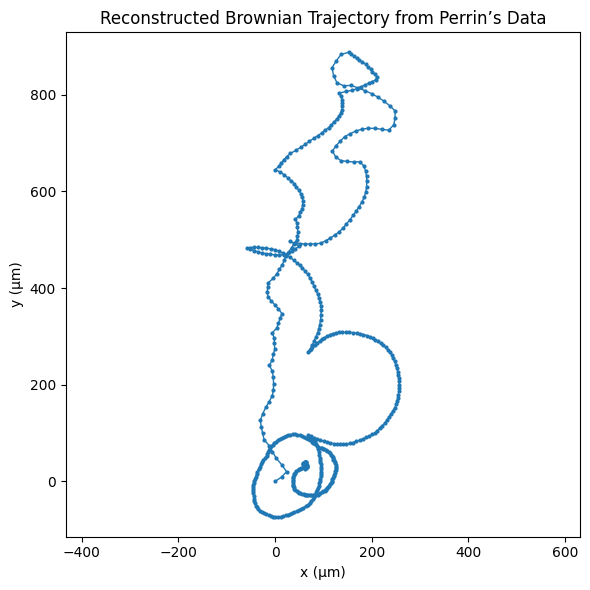

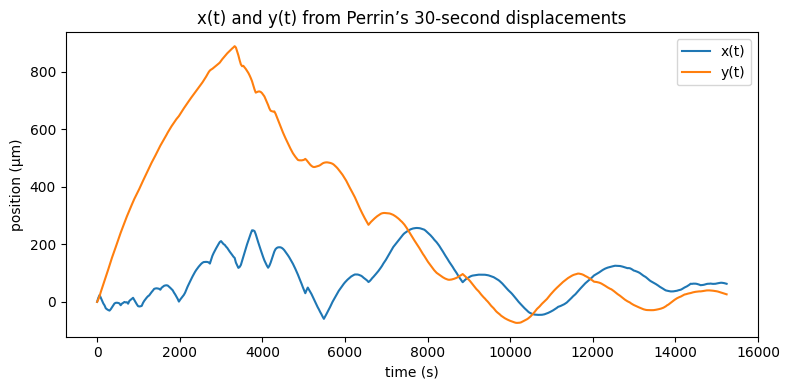

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# Load Perrin's displacement data (Δx, Δy)
# -------------------------------------------------------
df = pd.read_csv("g26perrindata.csv", header=None, names=["dx", "dy"], skiprows=1)
dx = df["dx"].astype(float).values
dy = df["dy"].astype(float).values

# -------------------------------------------------------
# Reconstruct the trajectory
# -------------------------------------------------------
x = np.cumsum(dx)
y = np.cumsum(dy)

# Add starting point (0,0)
x = np.insert(x, 0, 0)
y = np.insert(y, 0, 0)

# Time array (each step = 30 seconds)
t = np.arange(len(x)) * 30

# -------------------------------------------------------
# Plot trajectory like Fig. 3.3(a)
# -------------------------------------------------------
plt.figure(figsize=(6,6))
plt.plot(x, y, '-o', markersize=2, linewidth=1)
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")
plt.title("Reconstructed Brownian Trajectory from Perrin’s Data")
plt.axis("equal")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Plot x(t) and y(t) like Fig. 3.3(b)
# -------------------------------------------------------
plt.figure(figsize=(8,4))
plt.plot(t, x, label="x(t)")
plt.plot(t, y, label="y(t)")
plt.xlabel("time (s)")
plt.ylabel("position (µm)")
plt.title("x(t) and y(t) from Perrin’s 30‑second displacements")
plt.legend()
plt.tight_layout()
plt.show()

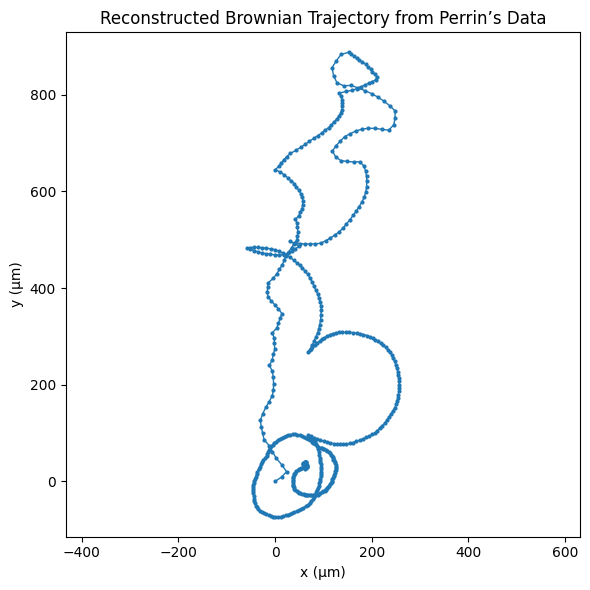

In [6]:
plt.figure(figsize=(6,6))
plt.plot(x, y, '-o', markersize=2, linewidth=1)
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")
plt.title("Reconstructed Brownian Trajectory from Perrin’s Data")
plt.axis("equal")
plt.tight_layout()
plt.show()


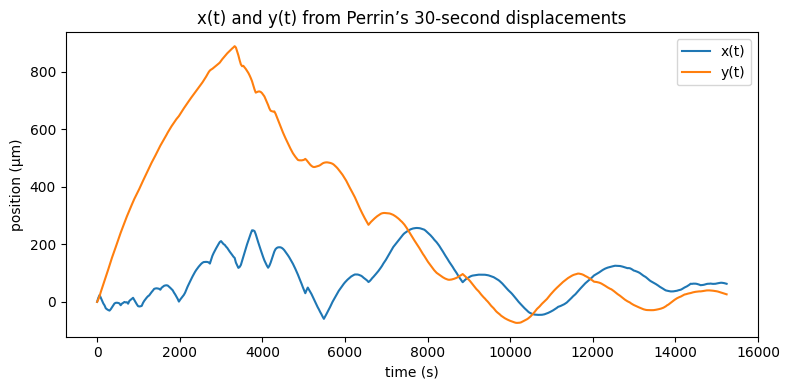

In [7]:
plt.figure(figsize=(8,4))
plt.plot(t, x, label="x(t)")
plt.plot(t, y, label="y(t)")
plt.xlabel("time (s)")
plt.ylabel("position (µm)")
plt.title("x(t) and y(t) from Perrin’s 30‑second displacements")
plt.legend()
plt.tight_layout()
plt.show()


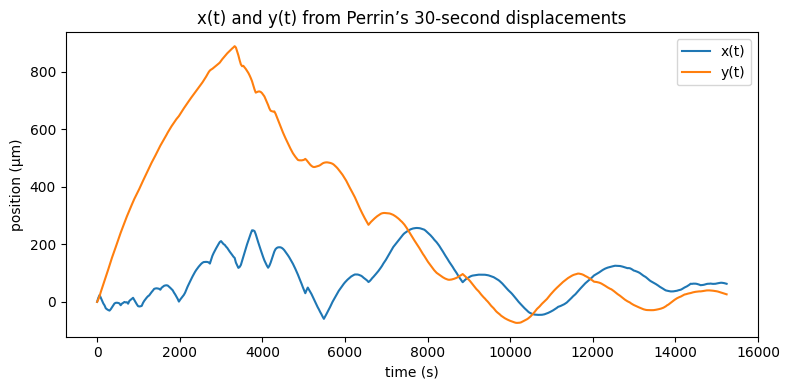

In [8]:
plt.figure(figsize=(8,4))
plt.plot(t, x, label="x(t)")
plt.plot(t, y, label="y(t)")
plt.xlabel("time (s)")
plt.ylabel("position (µm)")
plt.title("x(t) and y(t) from Perrin’s 30‑second displacements")
plt.legend()
plt.tight_layout()
plt.show()


After loading Perrin's 30-second displacement data into Colab, I cumulatively added up the Δx and Δy values to reconstruct the particle's Brownian journey. With step widths that change from one interval to the next, the resulting path is asymmetrical and uneven. In contrast, my simulated random-walk trajectories appear to have smoother statistical behavior and more consistent step sizes. Because molecule collisions in a fluid are inherently random, Perrin's actual data occasionally exhibits larger jumps and greater variability. The simulation and experiment both exhibit the same general diffusive wandering without a preferred direction, despite the fact that the real trajectory is more erratic.

## Browsing GitHub Repositories from Colab

Colab also supports special URLs that link directly to a GitHub browser for any user/organization, repository, or branch. For example:

- http://colab.research.google.com/github will give you a general github browser, where you can search for any github organization or username.
- http://colab.research.google.com/github/googlecolab/ will open the repository browser for the ``googlecolab`` organization. Replace ``googlecolab`` with any other github org or user to see their repositories.
- http://colab.research.google.com/github/googlecolab/colabtools/ will let you browse the main branch of the ``colabtools`` repository within the ``googlecolab`` organization. Substitute any user/org and repository to see its contents.
- http://colab.research.google.com/github/googlecolab/colabtools/blob/master will let you browse ``master`` branch of the ``colabtools`` repository within the ``googlecolab`` organization. (don't forget the ``blob`` here!) You can specify any valid branch for any valid repository.

## Loading Private Notebooks

Loading a notebook from a private GitHub repository is possible, but requires an additional step to allow Colab to access your files.
Do the following:

1. Navigate to http://colab.research.google.com/github.
2. Click the "Include Private Repos" checkbox.
3. In the popup window, sign-in to your Github account and authorize Colab to read the private files.
4. Your private repositories and notebooks will now be available via the github navigation pane.

## Saving Notebooks To GitHub or Drive

Any time you open a GitHub hosted notebook in Colab, it opens a new editable view of the notebook. You can run and modify the notebook without worrying about overwriting the source.

If you would like to save your changes from within Colab, you can use the File menu to save the modified notebook either to Google Drive or back to GitHub. Choose **File→Save a copy in Drive** or **File→Save a copy to GitHub** and follow the resulting prompts. To save a Colab notebook to GitHub requires giving Colab permission to push the commit to your repository.

## Open In Colab Badge

Anybody can open a copy of any github-hosted notebook within Colab. To make it easier to give people access to live views of GitHub-hosted notebooks,
colab provides a [shields.io](http://shields.io/)-style badge, which appears as follows:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

The markdown for the above badge is the following:

```markdown
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
```

The HTML equivalent is:

```HTML
<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

Remember to replace the notebook URL in this template with the notebook you want to link to.